## 3.4 군집분석(clustering)
### 3.4.1 K-means clustering 살펴보기

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


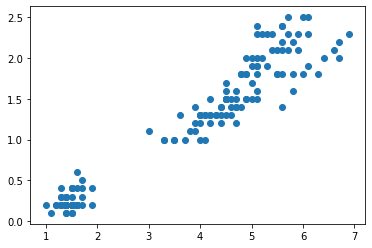

In [2]:
plt.scatter(df.iloc[:,2], df.iloc[:,3])
plt.show()

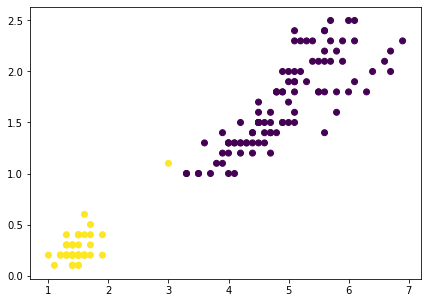

In [3]:
from sklearn.cluster import KMeans

plt.figure(figsize=(7,5))
km = KMeans(n_clusters=2, random_state=20)
km.fit(df.iloc[:, 2:])
y_pred = km.predict(df.iloc[:,2:])
plt.scatter(df.iloc[:,2], df.iloc[:,3], c=y_pred)

중앙의 노란점을 보라색 점으로 옮기려면:
1. GMM : k-means의 일반화 버전
2. (H)DBSCAN : 밀도기반의 군집분석

<Figure size 432x288 with 0 Axes>

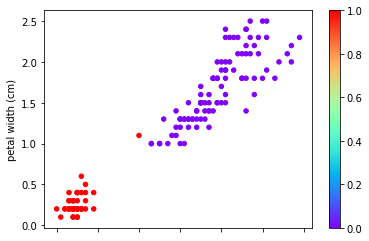

In [4]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')

fig = plt.figure()
xlabel, ylabel = df.columns[2:]
axes = df.iloc[:, 2:].plot.scatter(xlabel, ylabel, c=y_pred, cmap=plt.cm.rainbow)

In [5]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
y_pred[95:100]

array([0, 0, 0, 1, 0])

In [7]:
df.iloc[98, 2:]

petal length (cm)    3.0
petal width (cm)     1.1
Name: 98, dtype: float64

In [8]:
km.cluster_centers_

array([[4.92525253, 1.68181818],
       [1.49215686, 0.2627451 ]])

np.sqrt((x1 - x2)^2 + (y1 - y2)^2)

In [9]:
import numpy as np
P98 = df.iloc[98, 2:].values

for i, x in enumerate(km.cluster_centers_):
    d = np.sqrt((x - P98).dot(x - P98))
    print(f"distance with cluster{i} and P98 is {d}")
    

distance with cluster0 and P98 is 2.0112458036464465
distance with cluster1 and P98 is 1.7246990164733285


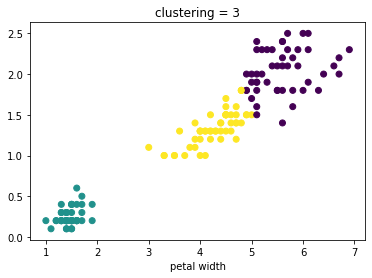

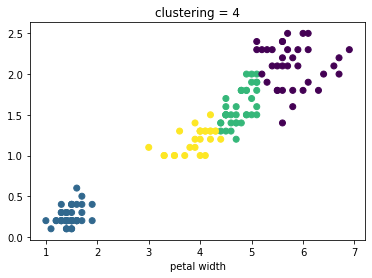

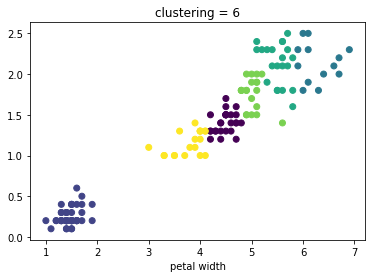

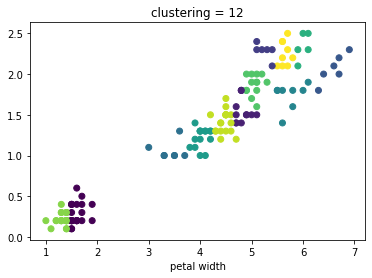

In [10]:
n_clusters = [3,4,6,12]
for i in n_clusters:
    count = 1
    km = KMeans(n_clusters=i, random_state=20)

    y_pred = km.fit_predict(df.iloc[:, 2:])
    plt.figure(count)
    plt.scatter(df.iloc[:,2], df.iloc[:,3], c=y_pred)
    plt.title("clustering = "+str(i))
    plt.xlabel('petal length')
    plt.xlabel('petal width')
    count += 1
    plt.show()

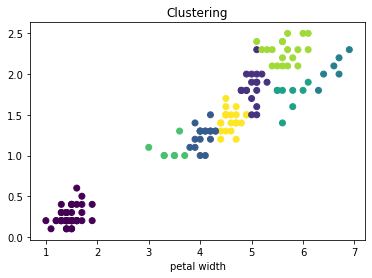

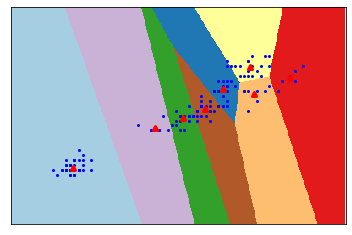

In [11]:
km12 = KMeans(n_clusters=8, random_state=20)
y_pred12 = km12.fit_predict(df.iloc[:, 2:])
plt.title("Clustering")
plt.xlabel('petal length')
plt.xlabel('petal width')
graph1 = plt.scatter(df.iloc[:, 2], df.iloc[:, 3], c=y_pred12)
plt.show()

h = .02
x_min, x_max = df.iloc[:, 2].min() -1, df.iloc[:, 2].max() +1
y_min, y_max = df.iloc[:, 3].min() -1, df.iloc[:, 3].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = km12.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')
plt.plot(df.iloc[:, 2], df.iloc[:, 3], 'bo', markersize=2)
centroids = km12.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='^', s=16, linewidths=3, color='r', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### 3.4.2 병합 군집
병합 군집(agglomerative clustering)은 흔히 계층적 군집(hyerachical clustering)이라고도 부르며 다음과 같은 알고리즘을 사용한다:
1. 각 sample point를 하나의 cluster로 설정하여 시작한다.
2. 유사한(거리가 가까운) cluster들을 하나의 cluster로 통합한다.
3. 2의 작업을 특정한 조건에 도달할 때 까지 반복한다.(sklearn에서는 clusters의 수)

병합군집은 cluster들을 병합하기 위한 여러가지 metric을 linkage 옵션으로 제공한다. 두 cluster $U, V$간 linkage($d(U,V)$)가 가장 짧은 두 cluster를 병합한다:
- centroid: 두 클러스터 U, V의 중심점(centroid)간 거리를 linkage로 정의한다.
$$d(U,V) = \|\mu_U - \mu_V\|_2$$
- single: 클러스터 $U$ 의 모든 데이터 $i$와 클러스터 $V$의 모든 데이터 $j$의 모든 조합에 대해 거리를 측정하여 최소값을 구한다. 최소 거리(Nearest Point) 방법이라고도 한다.
$$d(U,V) = \min(dist(U_i,V_j))$$
- complete: 클러스터 $U$ 의 모든 데이터 $i$와 클러스터 $V$의 모든 데이터 $j$의 모든 조합에 대해 거리를 측정하여 최대값을 구한다. Farthest Point Algorithm 또는 Voor Hees Algorithm 이라고도 한다.
$$d(U,V) = \max(dist(U_i,V_j))$$
- average: 클러스터 $U$ 의 모든 데이터 $i$와 클러스터 $V$의 모든 데이터 $j$의 모든 조합에 대해 거리를 측정하여 평균값을 구한다.
$$d(U,V) = \sum_{ij} \frac{dist(U_i,V_j)}{n_U n_V}$$
- Ward: Agglomerative Clustering 에서 사용할 수 있는 방법이다.
 - 두 군집간 결합시 분산(error sum-of-squares)의 증분(정보손실)이 최소가 되는 방법으로 병합한다.
$$d(U, V) = I_{UV} = ESS_{UV} - (ESS_U + ESS_V) = \cfrac {(\mu_U-\mu_V)^2}{\frac 1 {n_U} + \frac 1 {n_V}}$$
 - 이때 새로 병합된 군집의 centroid는 다음과 같이 계산된다.
$$C_{UV} = \cfrac {n_U \mu_U + n_V \mu_V}{n_U + n_V}$$
 - 만약 클러스터 $U$가 클러스터 $S$와 클러스터 $T$가 결합하여 생겼다면,
 - 다음과 같이 두 클러스터 $U, V$의 거리의 가중 평균에서 원래의 두 클래스터 사이의 거리를 보정한 값을 사용할 수 있다.
 $$d(U, V) = \sqrt{\frac{(n_V + n_S)(\mu_V - \mu_S)^2}{n_V + n_S + n_T} + \frac{(n_V + n_T)(\mu_V - \mu_T)^2}{n_V + n_S + n_T} - \frac{n_V (\mu_S - \mu_T)^2}{n_V + n_S + n_T}}$$
 
아쉽게도 sklearn의 AgglomerativeClustering 클래스는 하위 4개인 single, complete, average,ward 만이 구현되어 있다.

---
아래는 2차원 데이터셋에서 3개의 cluster를 찾기 위한 병합 군집의 과정이다.
![](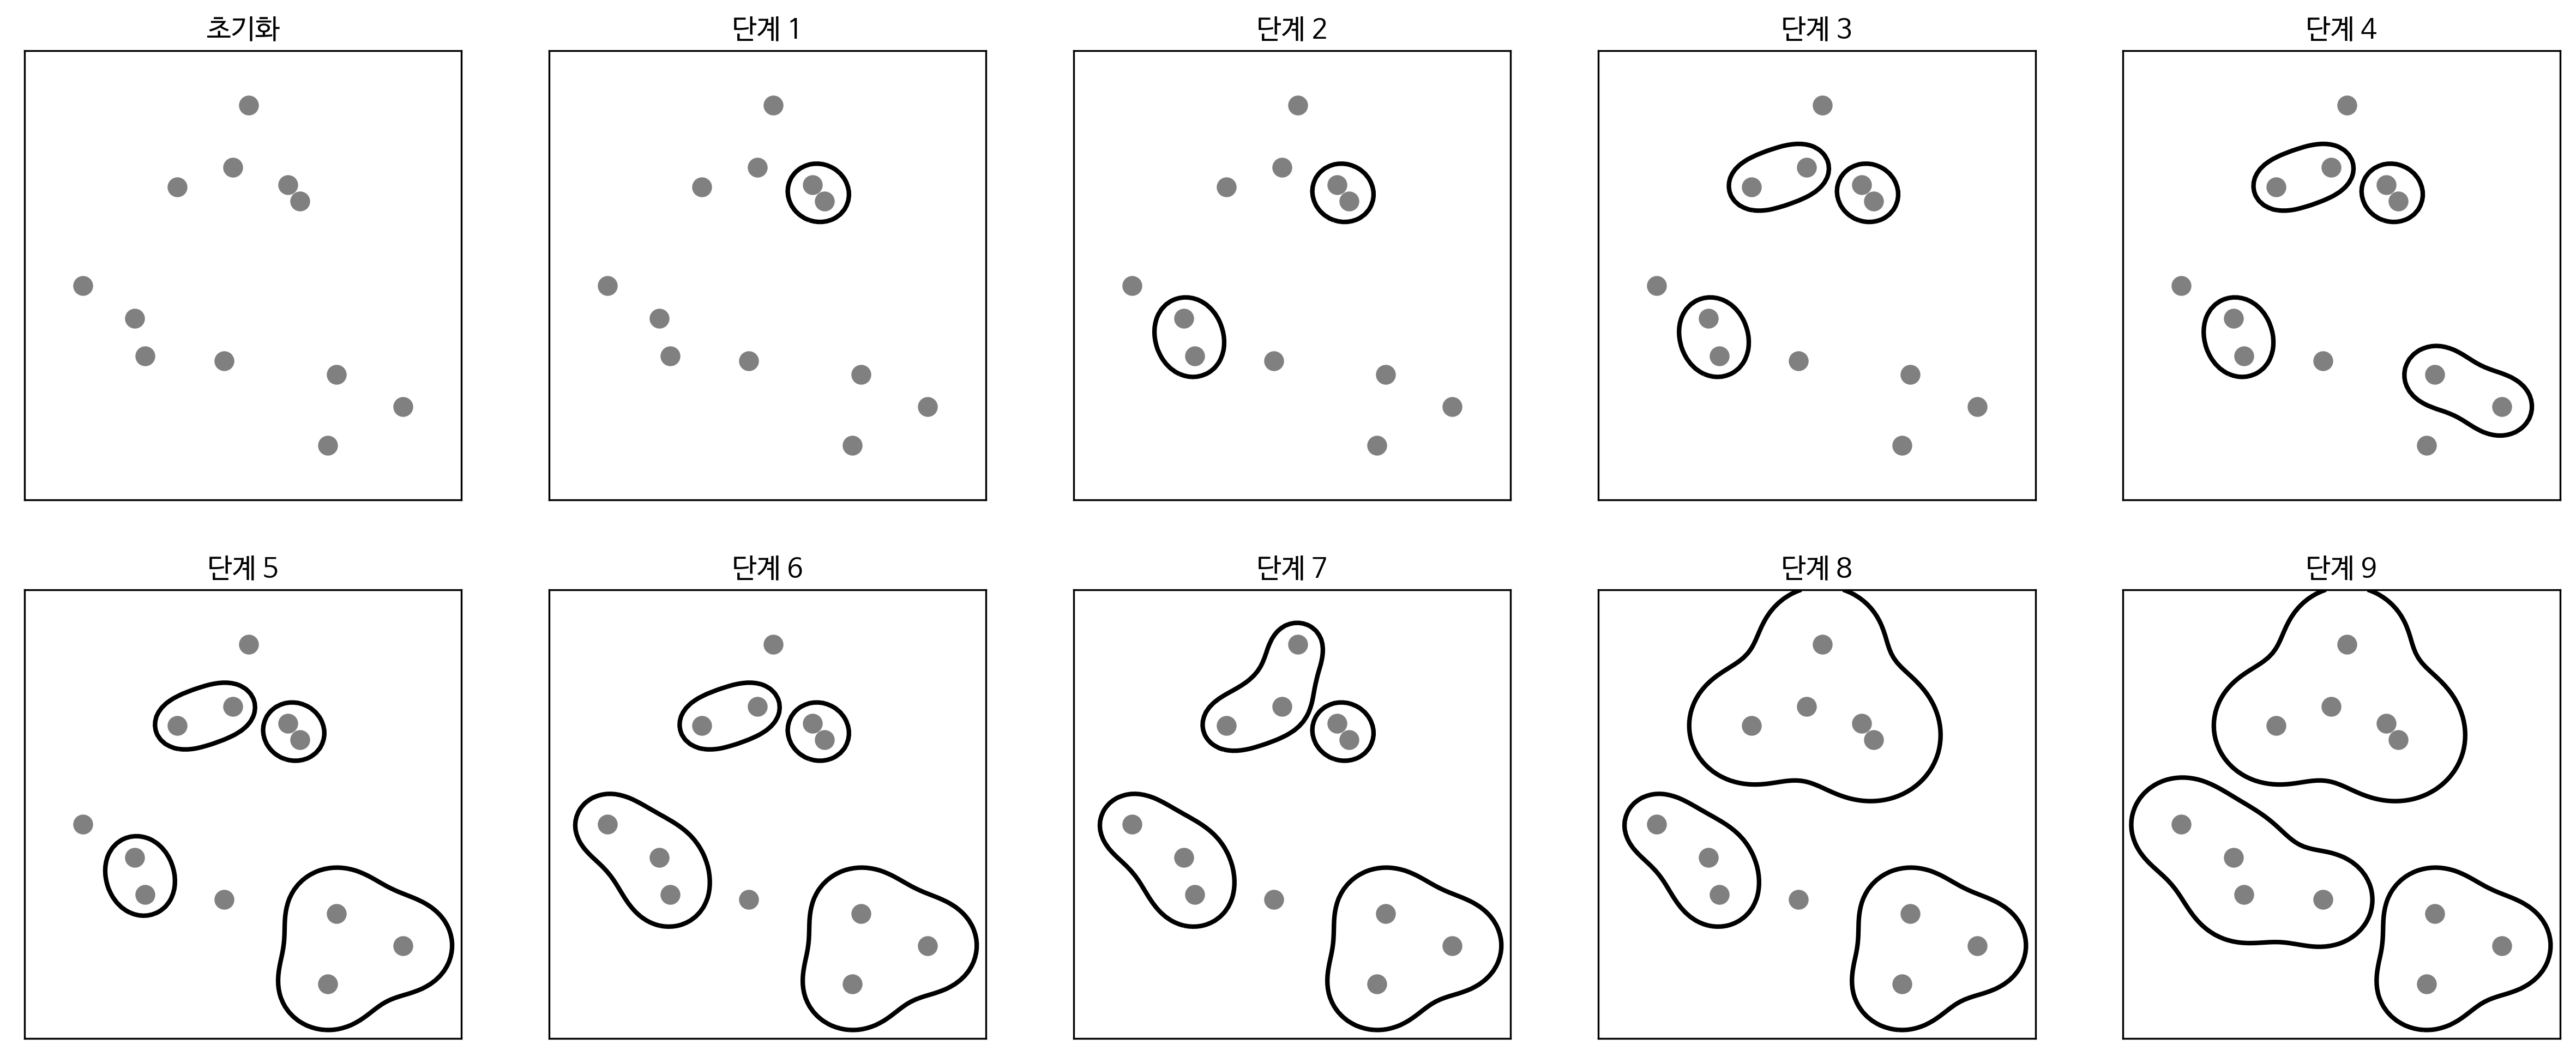%0A)

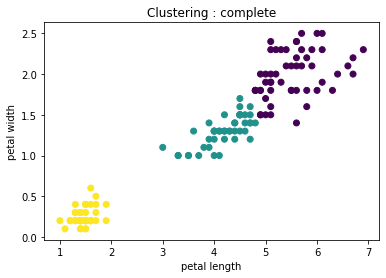

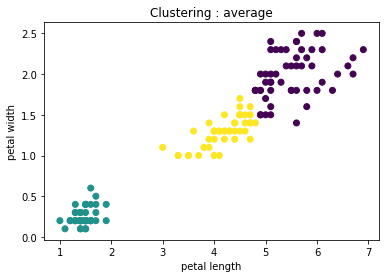

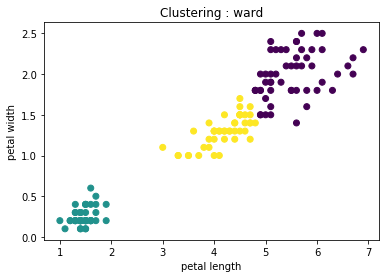

In [12]:
from sklearn.cluster import AgglomerativeClustering
linkages = ['complete', 'average', 'ward']
for i, l in enumerate(linkages):
    plt.figure(i)
    hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=l)
    hier.fit(df.iloc[:, 2:])
    plt.scatter(df.iloc[:, 2], df.iloc[:, 3], c=hier.labels_)
    plt.title("Clustering : "+l)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
plt.show()

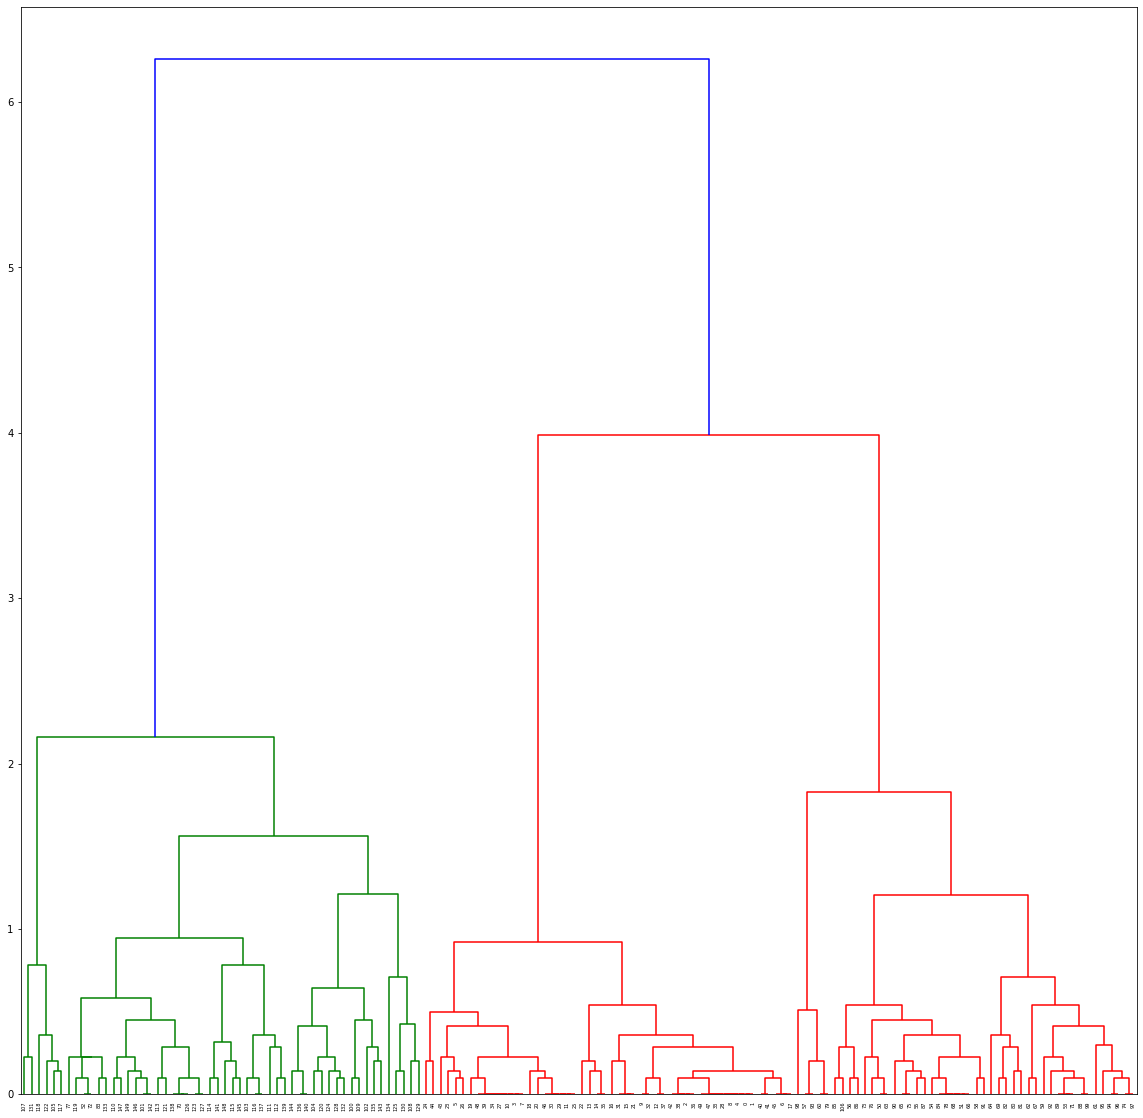

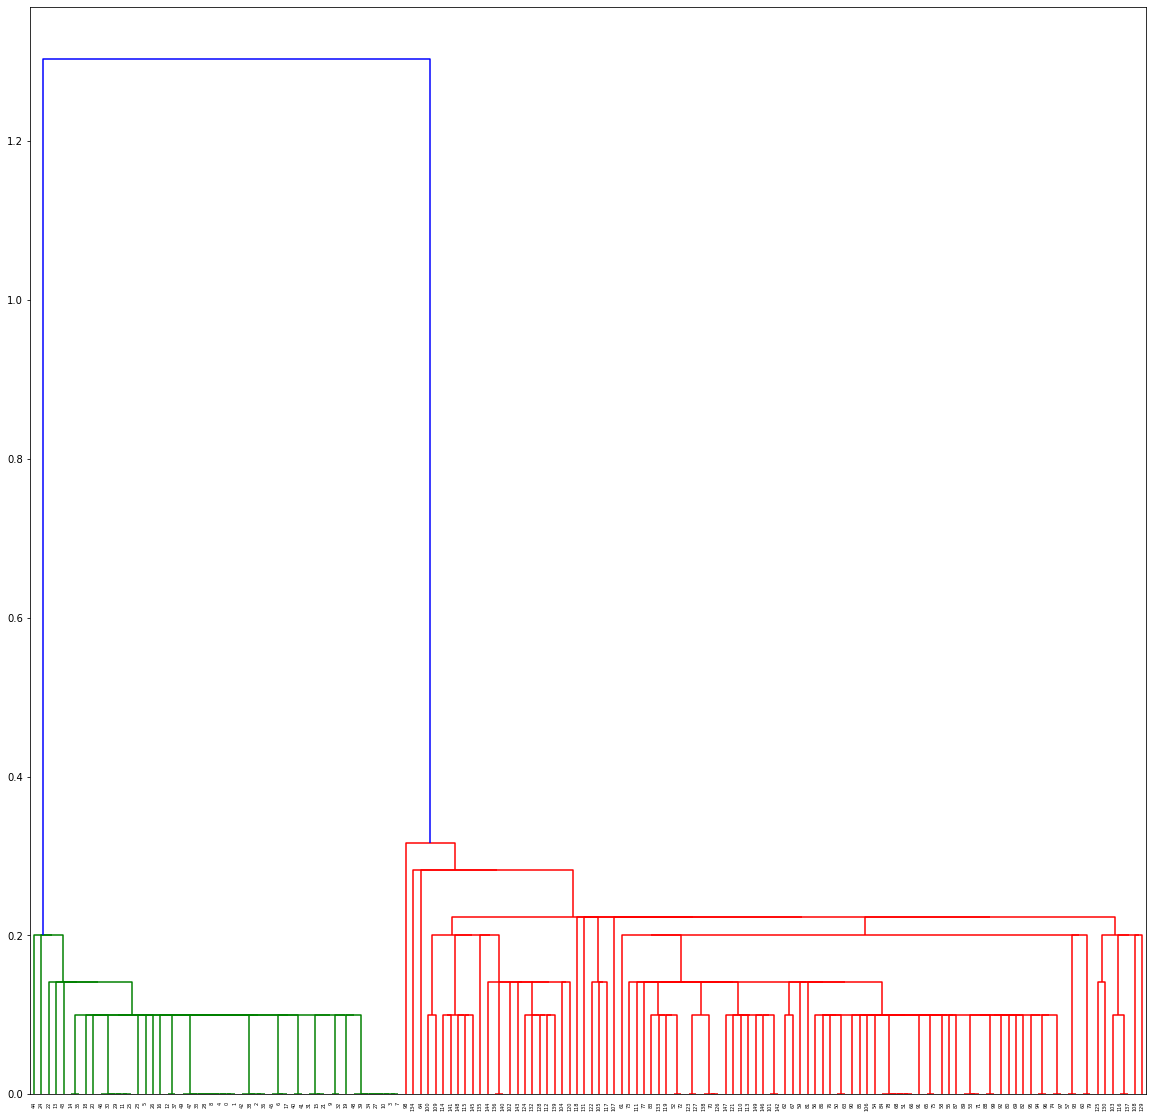

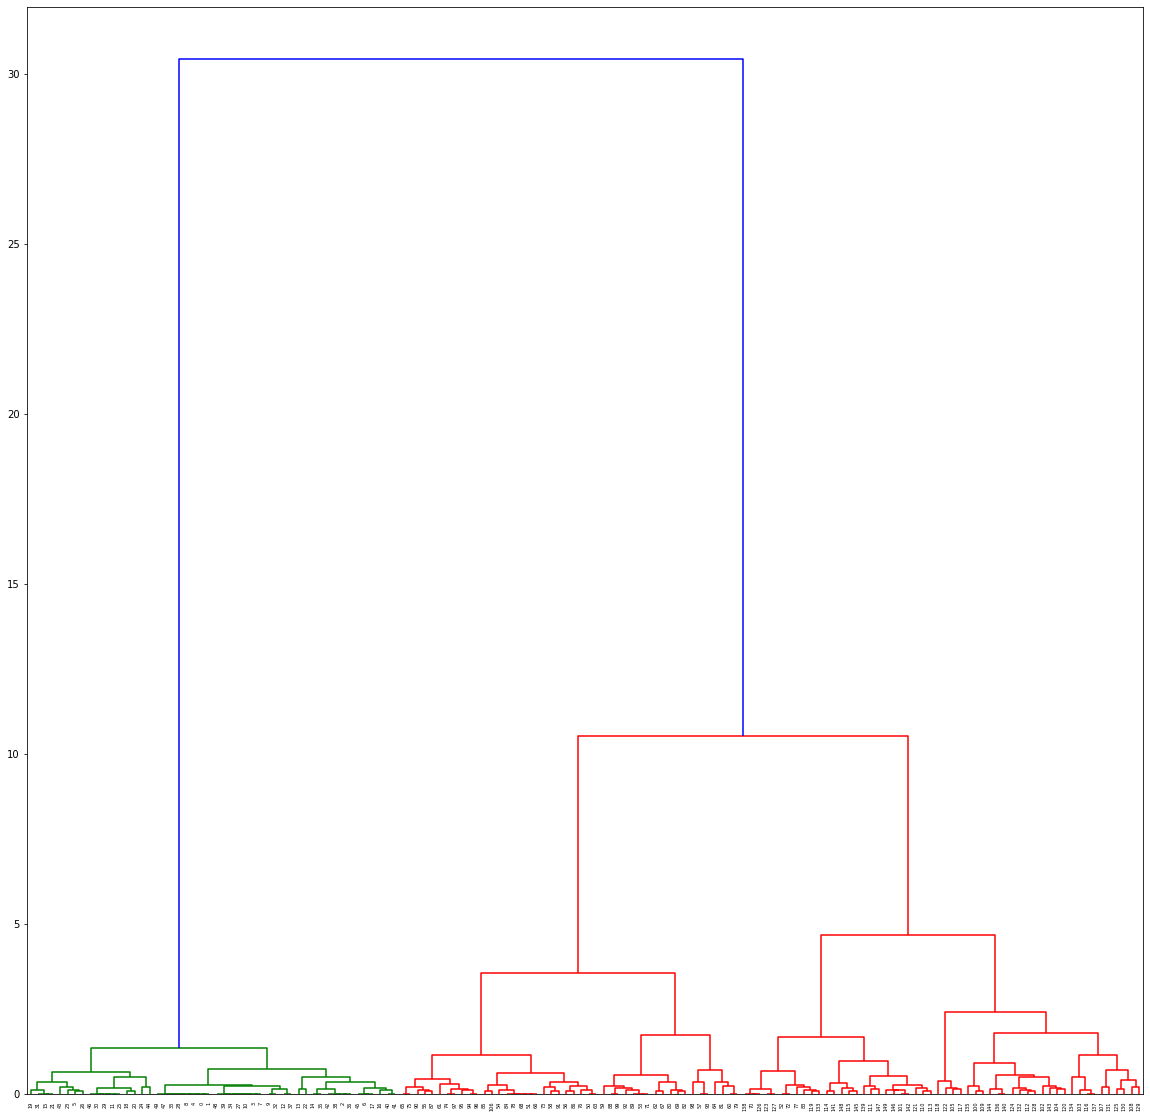

In [13]:
from scipy.cluster import hierarchy
hierar = hierarchy.linkage(df.iloc[:,2:], 'complete')
plt.figure(figsize=(20,20))
dn = hierarchy.dendrogram(hierar)

hierar = hierarchy.linkage(df.iloc[:,2:], 'single')
plt.figure(figsize=(20,20))
dn = hierarchy.dendrogram(hierar)

hierar = hierarchy.linkage(df.iloc[:,2:], 'ward')
plt.figure(figsize=(20,20))
dn = hierarchy.dendrogram(hierar)

### 3.5.3 DBSCAN
DBSCAN은 특성 공간에서 데이터가 밀집된 지역(dense region)의 포인트(핵심 샘플)를 찾아내어:
1. 밀집 지역을 하나의 클러스터로 구성하고,
2. 비어있는 지역을 경계로 다른 클러스터와 구분한다.

이를 위해 한 데이터 포인트에서 `eps` 거리 내에 `min_samples` 개 이상의 이웃이 있으면 이 포인트를 **핵심 샘플**로 분류하고, 핵심 샘플의 `eps` 거리 안에 있는 이웃을 cluster로 구성한다.

DBSCAN의 이러한 특성 때문에, two moons 데이터와 같이 복잡한 형상의 군집도 잘 찾아 낼 수 있지만, 다른 알고리즘에 비해 상대적으로 속도가 느리다.

#### 1) clustering procedure
1. 무작위로 개체를 선정한다.
2. `eps` 거리 내의 모든 포인트를 찾는다.
 - neighbors가 `min_samples`개 이하이면 cluster에 속하지 않는 잡음으로 라벨링한다.
 - neighbors가 `min_samples`개 이상이면, 핵심 샘플로 라벨링하고 새로운 cluster를 생성한다.
3. 2에서 발견된 핵심 샘플의 모든 neighbors에 대해:
 - 아직 어떤 cluster에도 할당되지 않았으면 2에서 생성한 cluster에 할당한다.
 - 2의 과정을 반복하고, 핵심샘플이면 3의 과정을 반복한다.
4. cluster 내의 모든 개체를 할당하여, 더 이상의 핵심샘플이 없을 때까지 반복한다.
5. 아직 방문하지 못한 개체를 선정하여 2의 과정을 반복한다.
6. 방문하지 못한 개체가 없으면 중단한다.

이 과정을 통해 3 종류의 개체로 분류된다:
- 핵심 샘플
- 경계 포인트(클러스터에 속함)
- 잡음 포인트(클러스터에 속하지 않음): 이상치일 확률이 높다.

DBSCAN을 여러번 실시하면:
- 핵심 샘플과 잡음은 항상 동일하고,
 - 상황(eps, n_samples)에 따라 상당히 근접한 잡음이 있을 수 있다.
- 경계 포인트는 하나 이상의 핵심 포인트의 이웃이 되어, 
 - 상황에 따라 서로 다른 cluster에 속할 수 있다.

이러한 과정은 아래 HDBSCAN에서 소개하는 **Robust Single Linkage** 알고리즘과 동일한데, 자세한 내용은 HDBSCAN의 발표논문 [Accelerated Hierarchical Density Clustering](https://arxiv.org/pdf/1705.07321.pdf) P5를 참고한다.

---
#### 2) DBSCAN의 적용
DBSCAN(eps=0.5, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=1)
- eps : float, optional. 두 개체를 neighbor로 평가하기 위한 임계거리
- min_samples : int, optional. 핵심 샘플로 평가하기 위한 eps 내의 임계 이웃 수.
- metric : string, or callable. 거리 측정을 위한 metric.
 - string은 [metrics.pairwise.pairwise_distance](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.pairwise_distances.html)에서 허용하는 옵션이어야 한다.
     - 이 함수의 metric 옵션으로 PAIRWISE_DISTANCE_FUNCTIONS의 keys가 사용될 수 있다.
     - PAIRWISE_DISTANCE_FUNCTIONS은 [pairwise.py](https://github.com/scikit-learn/scikit-learn/blob/adddf00433a961dc1186f91d791a11230f38840e/sklearn/metrics/pairwise.py#L1022)에 다음과 같이 지정되었다.
```python
PAIRWISE_DISTANCE_FUNCTIONS = {
    # If updating this dictionary, update the doc in both distance_metrics()
    # and also in pairwise_distances()!
    'cityblock': manhattan_distances,
    'cosine': cosine_distances,
    'euclidean': euclidean_distances,
    'l2': euclidean_distances,
    'l1': manhattan_distances,
    'manhattan': manhattan_distances,
    'precomputed': None,  # HACK: precomputed is always allowed, never called
}
```
 - callable은 paired distance를 (n_samples, n_samples)로 리턴할 수 있는 함수다.
- metric_params : dict, optional. metric 옵션에 입력되는 파라미터.
- algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}, optional
- leaf_size : int, optional (default = 30). BallTree or cKDTree에 전달될 인수.
 - 값을 늘리면 속도가 빨리지지만, 메모리 소요량도 늘어난다.
- p : float, optional. The power of the Minkowski metric.
- n_jobs : int, optional (default = 1)

속성:
- `core_sample_indices_` : array, shape = [n_core_samples]. 핵심 샘플의 색인.
- `components_` : array, shape = [n_core_samples, n_features]. 핵심 샘플의 값.
- `labels_` : array, shape = [n_samples]. 할당된 cluster의 라벨
 - 잡음 포인트는 `-1`로 기록된다.

메소드: 

| 메소드 | 설명 |
|----------|-----------------|
| fit(X[, y, sample_weight]) | Perform DBSCAN clustering from features or distance matrix. |
| fit_predict(X[, y, sample_weight]) | Performs clustering on X and returns cluster labels. |
| get_params([deep]) | Get parameters for this estimator. |
| set_params(**params) | Set the parameters of this estimator. |

- X: array or sparse (CSR) matrix of shape (n_samples, n_features), or array of shape (n_samples, n_samples).
 - 학습 데이터셋이거나 학습 데이터로부터 계산된 distance matrix이다.
- sample_weight: array, shape (n_samples,), optional
 - sample에 대한 가중치가 되며, 이 값이 `min_samples`보다 크면 자체로 핵심 샘플이 된다.
 - 이 값이 `-`이면 결코 핵심 샘플이 될 수 없다.
- 학습된 결과를 새로운 데이터에 적용할 수 없으므로 predict없이 fit_predict만 있다.

In [54]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
df.mean(axis=0).shape

(4,)

In [56]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=.5, min_samples=10)
scaled = (df - df.mean(axis=0)) / df.std(axis=0)

In [57]:
scaled.mean(axis=0)

sepal length (cm)   -1.457168e-15
sepal width (cm)    -1.638319e-15
petal length (cm)   -1.292300e-15
petal width (cm)    -5.543714e-16
dtype: float64

In [58]:
scaled.std(axis=0)

sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64

In [19]:
scaled.shape

(150, 4)

2차원공간에서 2개의 변수로 클러스터링이 잘 이뤄졌는 지 교육적으로 보여주기 위함

In [59]:
db.fit(scaled.iloc[:, 2:])

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [60]:
db.fit(scaled)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [61]:
y_pred = db.fit_predict(scaled)

In [62]:
db.labels_[:10]

array([ 0,  0,  0,  0,  0, -1,  0,  0, -1,  0], dtype=int64)

In [63]:
y_pred[:10]

array([ 0,  0,  0,  0,  0, -1,  0,  0, -1,  0], dtype=int64)

In [64]:
scaled[:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
5,-0.535384,1.933315,-1.165809,-1.048667
6,-1.501490,0.786174,-1.335752,-1.179859
7,-1.018437,0.786174,-1.279104,-1.311052
8,-1.743017,-0.360967,-1.335752,-1.311052
9,-1.139200,0.097889,-1.279104,-1.442245


In [65]:
np.unique(y_pred)

array([-1,  0,  1,  2], dtype=int64)

In [66]:
np.unique(y_pred, return_counts=True)

(array([-1,  0,  1,  2], dtype=int64), array([89, 37, 14, 10], dtype=int64))

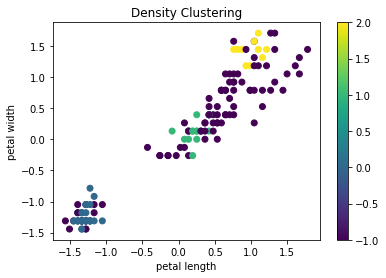

In [67]:
plt.scatter(scaled.iloc[:,2], scaled.iloc[:,3], c=y_pred)
plt.title("Density Clustering")
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.colorbar()

In [68]:
cols = df.columns[2:]
tmp = pd.DataFrame(scaled.iloc[:,2:], columns=cols)

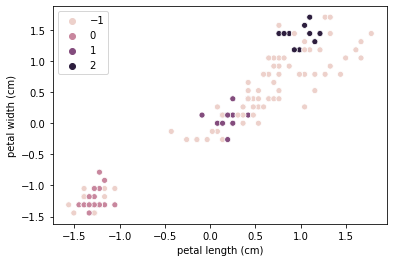

In [69]:
import seaborn as sns
sns.scatterplot(data=tmp, hue=y_pred, x=cols[0], y=cols[1])
plt.legend(loc=2)

(array([-1,  0,  1], dtype=int64), array([34, 45, 71], dtype=int64))


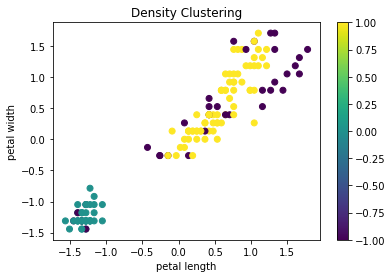

In [70]:
db.set_params(min_samples=5)
y_pred = db.fit_predict(scaled)
print(np.unique(y_pred, return_counts=True))
plt.scatter(scaled.iloc[:,2], scaled.iloc[:,3], c=y_pred)
plt.title("Density Clustering")
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.colorbar()

(array([0, 1], dtype=int64), array([ 50, 100], dtype=int64))


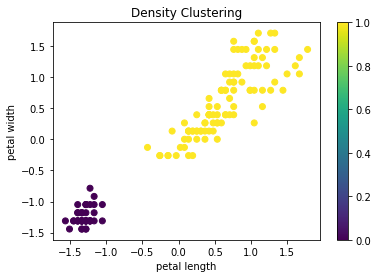

In [52]:
db.set_params(min_samples=5)
y_pred = db.fit_predict(scaled.iloc[:, 2:])
print(np.unique(y_pred, return_counts=True))
plt.scatter(scaled.iloc[:,2], scaled.iloc[:,3], c=y_pred)
plt.title("Density Clustering")
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.colorbar()

(array([-1,  0], dtype=int64), array([123,  27], dtype=int64))
(array([0, 1], dtype=int64), array([ 50, 100], dtype=int64))
(array([0, 1], dtype=int64), array([ 50, 100], dtype=int64))
(array([0], dtype=int64), array([150], dtype=int64))


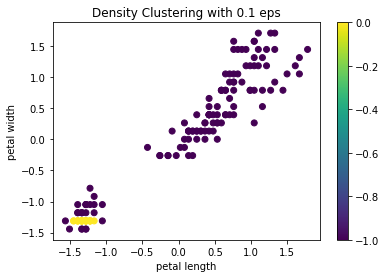

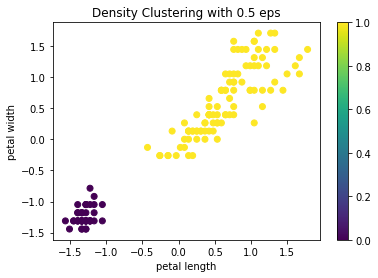

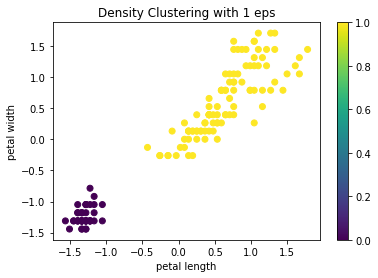

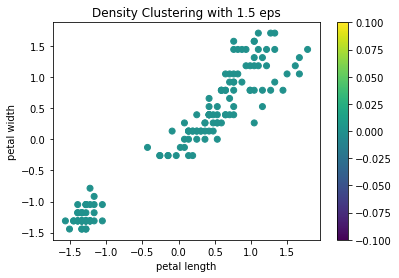

In [71]:
epss = [.1, .5, 1, 1.5]
for i, eps in enumerate(epss):
    plt.figure(i)
    db.set_params(eps=eps, min_samples=10)
    y_pred = db.fit_predict(scaled.iloc[:, 2:])
    print(np.unique(y_pred, return_counts=True))
    plt.scatter(scaled.iloc[:,2], scaled.iloc[:,3], c=y_pred)
    plt.title(f"Density Clustering with {eps} eps")
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.colorbar()

[Quiz] 노이즈를 제외하고 eps와 min_samples를 튜닝하여 3개의 군집이 나오도록 해보자.

In [74]:
epss = [.3, .5, .7, 1.]
ms = [4, 6, 8]
alls = {}
alls['eps'], alls['ms'], alls['db'], alls['labels'] = [],[],[],[]
for e in epss:
    for s in ms:
        db = DBSCAN(eps=e, min_samples=s)
        db.fit_predict(scaled)
        labels = db.labels_
        idx, freq = np.unique(labels, return_counts=True)
        if idx[-1] == 2:
            alls['eps'].append(e)
            alls['ms'].append(s)
            alls['db'].append(db)
            alls['labels'].append(labels)
alls

{'eps': [0.5],
 'ms': [8],
 'db': [DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
         metric_params=None, min_samples=8, n_jobs=None, p=None)],
 'labels': [array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1, -1,  0,
          0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
          0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,
         -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,
         -1,  1, -1,  1, -1,  1,  1,  1, -1,  2,  1,  1,  1,  1,  1, -1,  1,
         -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,
          2,  2,  2, -1, -1, -1, -1, -1,  2, -1,  2, -1, -1,  2,  2, -1, -1,
         -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
         -1,  2,  1,  2,  2,  2, -1,  2,  2,  2, -1,  2, -1, -1],
        dtype=int64)]}

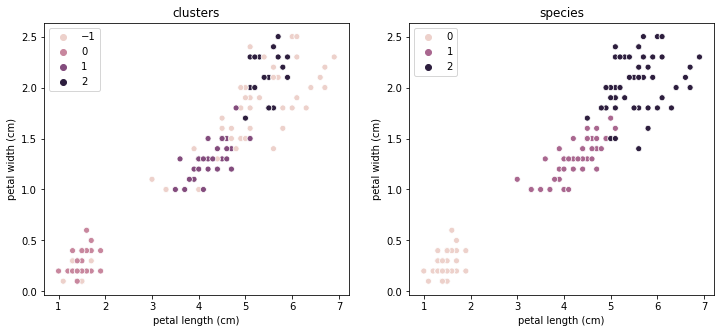

In [81]:
cols = df.columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes = axes.ravel()
titles = ['clusters', 'species']
for ax, hue, title in zip(axes, [alls['labels'][0], iris.target], titles):
    sns.scatterplot(data=df, hue=hue, x=cols[2], y=cols[3], ax=ax)
    ax.legend(loc=2)
    ax.set_title(title)